## Exploratory Data Analysis

### Roles to explore

In [1]:
# Importing libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\UYEN\tools\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

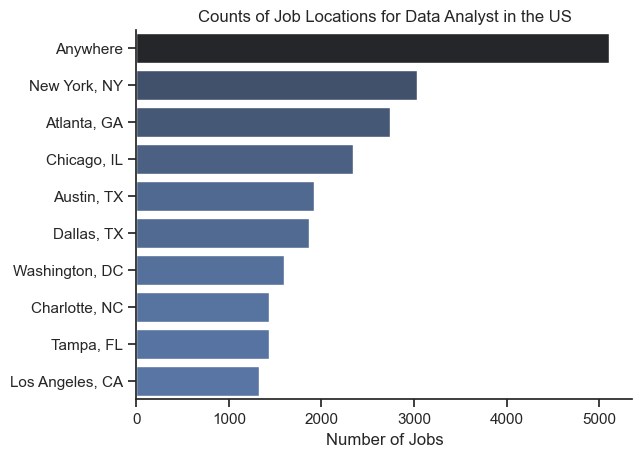

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

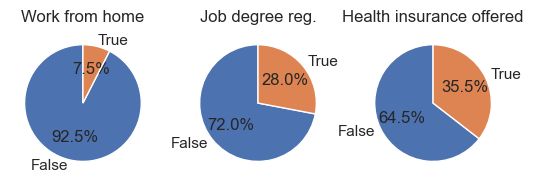

In [10]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job degree reg.',
    'job_health_insurance': 'Health insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    # print(i, column, title)
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
   

plt.show()


### Company to explore

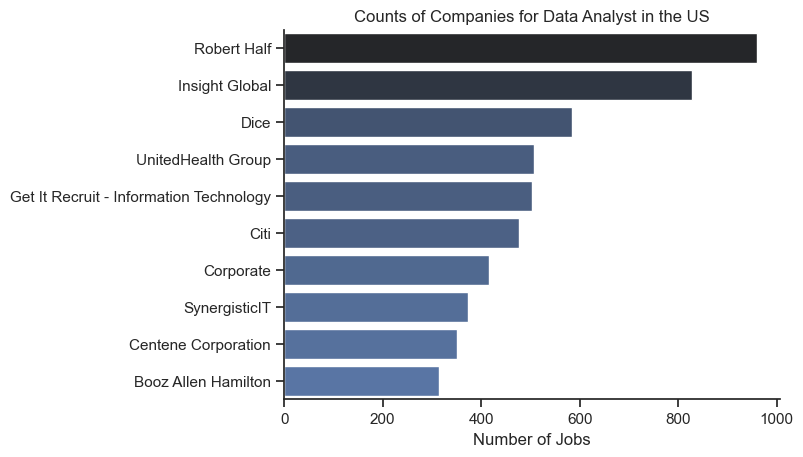

In [5]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()